In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Load Data

In [ ]:
#Read Indeks Pendidikan
df_IndeksPendidikan = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Copy of bps-od_15045_indeks_pendidikan_berdasarkan_kabupatenkota_data.xlsx")

In [ ]:
#Read Kegiatan Pemberantasan Akasara
df_Aksara = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Copy of dpmdes-idm_sts_kgtn_pemberatasan_buta_aksara__des_kel_data.xlsx")

In [ ]:
#Read Pusat Kegiatan belajar
df_PusBel = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Copy of dpmdes-idm_sedia_pusat_kgtn_belajar_msyrkt_pkbm_kejar_paket_ab_c__des__data.xlsx")

In [ ]:
#Read Perpustakaan
df_Perpus = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Copy of dpmdes-idm_sedia_fslts_prpstkn_desataman_bacaan_msyrkt__des_kel_data.xlsx")

In [ ]:
#Read Jumlah Angkatan Kerja
df_AngkKerja = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Copy of disnakertrans-od_15776_jumlah_angkatan_kerja_berdasarkan_kabupatenkota_data.xlsx")

In [ ]:
#Read Jumlah kepadatan penduduk
df_Kepadatan = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Copy of disdukcapil-2-od_17020_kepadatan_penduduk_berdasarkan_kabupatenkota_data.xlsx")

In [ ]:
#Read Jumlah SD
df_JumlahSD = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Jumlah Sekolah Dasar.xlsx")

In [ ]:
#Read Jumlah SMP
df_JumlahSMP = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Jumlah Sekolah Menengah Pertama (SMP).xlsx")

In [ ]:
#Read Jumlah SMA
df_JumlahSMA = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Jumlah Sekolah Menengah Atas.xlsx")

In [ ]:
#Read Jumlah SMK
df_JumlahSMK = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Jumlah Sekolah Menengah Kejuruan.xlsx")

In [ ]:
#Read Jumlah Guru SD
df_GuruSD = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Jumlah Guru Sekolah Dasar.xlsx")

In [ ]:
#Read Jumlah Guru SMP
df_GuruSMP = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Jumlah Guru Sekolah Menengah Pertama.xlsx")

In [ ]:
#Read Jumlah Guru SMA
df_GuruSMA = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Jumlah Guru Sekolah Menengah Atas.xlsx")

In [ ]:
#Read Jumlah Guru SMK
df_GuruSMK = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Jumlah Guru Sekolah Menengah Kejuruan.xlsx")

In [ ]:
#Read Jarak tempuh SD
df_JarakSD = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Copy of dpmdes-idm_wkt_tmph_ke_sklh_dasar_mdrsh_ibtidaiah_sdmi_terdekar__des_k_data.xlsx")

In [ ]:
#Read Jarak tempuh SMP
df_JarakSMP = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Copy of dpmdes-idm_wkt_tmph_ke_sklh_mngh_prtm_mdrsh_tsanawiyah_smpmts_terdekar_data.xlsx")

In [ ]:
#Read Jarak tempuh SMA
df_JarakSMA = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Copy of dpmdes-idm_wkt_tmph_ke_sklh_mngh_mdrsh_aliahsklh_mngh_kejuruan_smamasm_data.xlsx")

In [ ]:
#Read Garis Kemiskinan 
df_GarisMiskin = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Kumpulan Data Baru/Copy of Garis Kemiskinan Menurut Kab_Kota.xlsx")

# Fitur Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def Encode(df,variable):
        le = LabelEncoder()
        try:
            df[variable] = le.fit_transform(df[variable])
        except:
            print('Error encoding '+variable)
        return df

In [ ]:
#Select data from designated origin year
def selectyear(df,variable,year):
      df = df.loc[df[variable]>=year]
      return df

In [ ]:
#Aggregate sum
def aggsum(df,variable_year,variable_kabupaten,target):
   df= df.groupby([variable_year,variable_kabupaten])[target].agg('sum')
   df = df.to_frame()
   df= df.reset_index()
   return df

In [ ]:
#Aggregate mean
def aggaverage(df,variable_year,variable_kabupaten,target):
   df= df.groupby([variable_year,variable_kabupaten])[target].agg('mean')
   df = df.to_frame()
   df= df.reset_index()
   return df

In [ ]:
#Aggregate median
def aggmedian(df,variable_year,variable_kabupaten,target):
   df= df.groupby([variable_year,variable_kabupaten])[target].agg('median')
   df = df.to_frame()
   df= df.reset_index()
   return df

In [ ]:
#Renaming kabupaten column to match other dataframe
def changecol(df,oldname):
    df = df.rename(columns={oldname: 'kabupaten'})
    return df

## TREAT INDEKS PENDIDIKAN

In [ ]:
df_IP= selectyear(df_IndeksPendidikan,'tahun',2019)
df_IP = df_IP[['tahun','nama_kabupaten_kota','indeks_pendidikan']]

In [ ]:
df_IP['nama_kabupaten_kota'].unique()

array(['KABUPATEN BOGOR', 'KABUPATEN SUKABUMI', 'KABUPATEN CIANJUR',
       'KABUPATEN BANDUNG', 'KABUPATEN GARUT', 'KABUPATEN TASIKMALAYA',
       'KABUPATEN CIAMIS', 'KABUPATEN KUNINGAN', 'KABUPATEN CIREBON',
       'KABUPATEN MAJALENGKA', 'KABUPATEN SUMEDANG',
       'KABUPATEN INDRAMAYU', 'KABUPATEN SUBANG', 'KABUPATEN PURWAKARTA',
       'KABUPATEN KARAWANG', 'KABUPATEN BEKASI',
       'KABUPATEN BANDUNG BARAT', 'KABUPATEN PANGANDARAN', 'KOTA BOGOR',
       'KOTA SUKABUMI', 'KOTA BANDUNG', 'KOTA CIREBON', 'KOTA BEKASI',
       'KOTA DEPOK', 'KOTA CIMAHI', 'KOTA TASIKMALAYA', 'KOTA BANJAR'],
      dtype=object)

In [ ]:
df_IP = changecol(df_IP,'nama_kabupaten_kota')

In [ ]:
df_IP

,tahun,kabupaten,indeks_pendidikan
240,2019,KABUPATEN BOGOR,62.27
241,2019,KABUPATEN SUKABUMI,57.34
242,2019,KABUPATEN CIANJUR,56.51
243,2019,KABUPATEN BANDUNG,64.52
244,2019,KABUPATEN GARUT,57.87
...,...,...,...
316,2021,KOTA BEKASI,76.87
317,2021,KOTA DEPOK,76.89
318,2021,KOTA CIMAHI,75.29
319,2021,KOTA TASIKMALAYA,69.12


**EDA Indeks Pendidikan**

[Text(0.5, 1.0, 'Keseluruhan Indeks pendidikan tiap kabupaten/kota tahun 2019')]

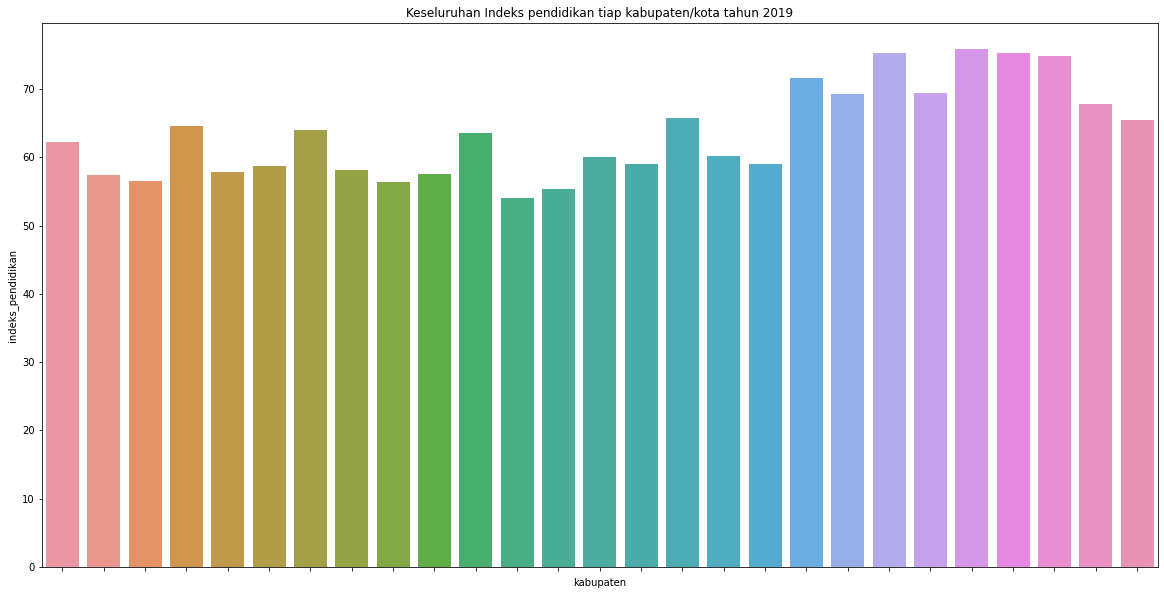

In [ ]:
# Showing the distribution of TARGET
plt.figure(figsize=(20,10))
bar_IP = sns.barplot(x=df_IP['kabupaten'].loc[df_IP['tahun']==2019],
                 y=df_IP['indeks_pendidikan'].loc[df_IP['tahun']==2019])

bar_IP.set(xticklabels=[])  # remove the tick labels
bar_IP.set(title='Keseluruhan Indeks pendidikan tiap kabupaten/kota tahun 2019')  # add a title
#bar_IP.set(xlabel=None)  # remove the axis label

In [ ]:
df_IP[['kabupaten','indeks_pendidikan']].loc[df_IP['tahun']==2019].min()

kabupaten            KABUPATEN BANDUNG
indeks_pendidikan                53.97
dtype: object

In [ ]:
df_IP[['kabupaten','indeks_pendidikan']].loc[df_IP['tahun']==2019].max()

kabupaten            KOTA TASIKMALAYA
indeks_pendidikan               75.86
dtype: object

In [ ]:
df_IP['indeks_pendidikan'].loc[df_IP['tahun']==2019].mean()

63.520370370370365

Dapat diketahui bahwa dari data tahun 2019, nilai indeks pendidikan paling rendah berada di kabupaten bandung, sedangkan paling tinggi berada di kota tasikmalaya dengan angka 75.86.
Rata-rata indeks pendidikan di jawa barat adalah 63.5


In [ ]:
def avgpertahun(df,target_variable,column_year):
    d = {'tahun': ['2019','2020','2021'],
       target_variable: [df[target_variable].loc[df[column_year]==2019].mean(),df[target_variable].loc[df[column_year]==2020].mean(),df[target_variable].loc[df[column_year]==2021].mean()],
        }
    dataframe = pd.DataFrame(data=d)
    return dataframe 

  tahun  indeks_pendidikan
0  2019          63.520370
1  2020          63.997407
2  2021          64.460370


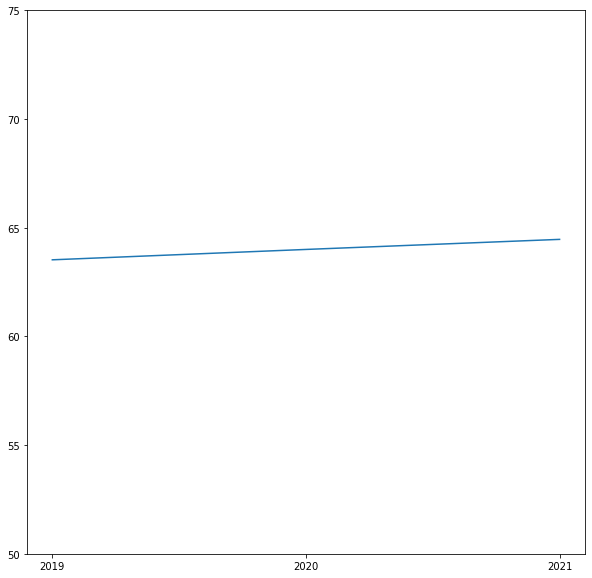

In [ ]:
graphIP = avgpertahun(df_IP,'indeks_pendidikan','tahun')
print(graphIP)
plt.figure(figsize=(10,10))
x=graphIP['tahun']
y=graphIP['indeks_pendidikan']
plt.ylim(ymin=50,ymax=75)
df_plot = plt.plot(x,y)

Dapat diketahui bahwa dalam waktu 3 tahun, nilai indeks pendidikan menunjukkan trend yang meningkat, dengan penambahan sekitar 0.5 per tahunnya

## TREAT JUMLAH KEGIATAN PEMBERANTASAN AKSARA

In [ ]:
Encode(df_Aksara,'status_kegiatan_buta_aksara')

,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,status_kegiatan_buta_aksara,tahun,id
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190006,WANAHERANG,32.01.02,GUNUNG PUTRI,32.01.02.2001,WANAHERANG,0,2019,1
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190010,BOJONG KULUR,32.01.02,GUNUNG PUTRI,32.01.02.2002,BOJONG KULUR,1,2019,2
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190009,CIANGSANA,32.01.02,GUNUNG PUTRI,32.01.02.2003,CIANGSANA,1,2019,3
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190002,GUNUNG PUTRI,32.01.02,GUNUNG PUTRI,32.01.02.2004,GUNUNG PUTRI,1,2019,4
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190004,BOJONG NANGKA,32.01.02,GUNUNG PUTRI,32.01.02.2005,BOJONG NANGKA,0,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,32,JAWA BARAT,3279,KOTA BANJAR,3279020,PURWAHARJA,3279020004,MEKARHARJA,32.79.03,PURWAHARJA,32.79.03.2003,MEKARHARJA,1,2021,15932
15932,32,JAWA BARAT,3279,KOTA BANJAR,3279040,LANGENSARI,3279040004,LANGENSARI,32.79.04,LANGENSARI,32.79.04.2001,LANGENSARI,0,2021,15933
15933,32,JAWA BARAT,3279,KOTA BANJAR,3279040,LANGENSARI,3279040003,REJASARI,32.79.04,LANGENSARI,32.79.04.2002,REJASARI,1,2021,15934
15934,32,JAWA BARAT,3279,KOTA BANJAR,3279040,LANGENSARI,3279040006,WARINGINSARI,32.79.04,LANGENSARI,32.79.04.2003,WARINGINSARI,1,2021,15935


In [ ]:
#Agregasi mean untuk mengetahui berapa persen dilakukan kegiatan pemberantasan buta aksara dari tiap kelurahan
df_Aksara = aggaverage(df_Aksara,'tahun','bps_nama_kabupaten_kota','status_kegiatan_buta_aksara')

In [ ]:
df_Aksara = changecol(df_Aksara,'bps_nama_kabupaten_kota')

In [ ]:
df_Aksara.head(10)

,tahun,kabupaten,status_kegiatan_buta_aksara
0,2019,KABUPATEN BANDUNG,0.744444
1,2019,KABUPATEN BANDUNG BARAT,0.684848
2,2019,KABUPATEN BEKASI,0.766667
3,2019,KABUPATEN BOGOR,0.697115
4,2019,KABUPATEN CIAMIS,0.794574
5,2019,KABUPATEN CIANJUR,0.833333
6,2019,KABUPATEN CIREBON,0.849515
7,2019,KABUPATEN GARUT,0.857482
8,2019,KABUPATEN INDRAMAYU,0.779935
9,2019,KABUPATEN KARAWANG,0.767677


**EDA Kegiatan Pemberantasan Buta Aksara**

  tahun  status_kegiatan_buta_aksara
0  2019                     0.809918
1  2020                     0.787238
2  2021                     0.771846


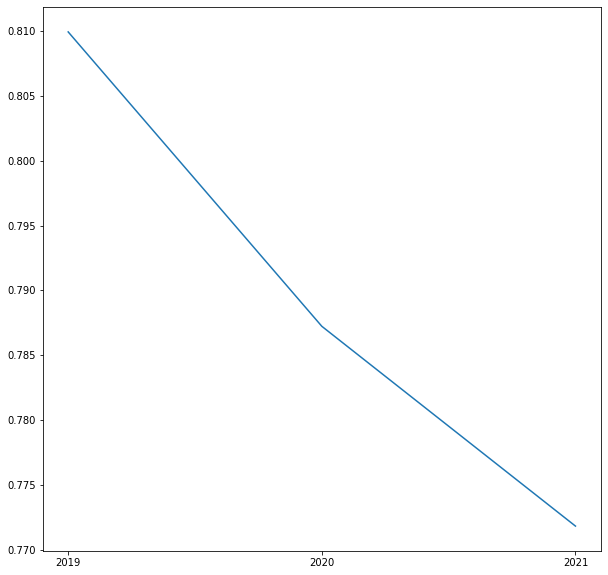

In [ ]:
graphAks = avgpertahun(df_Aksara,'status_kegiatan_buta_aksara','tahun')
print(graphAks)
plt.figure(figsize=(10,10))
x=graphAks['tahun']
y=graphAks['status_kegiatan_buta_aksara']
#plt.ylim(ymin=50,ymax=75)
df_plot = plt.plot(x,y)

Dapat diketahui bahwa dalam waktu 3 tahun, status kegiatan pemberantasan buta aksara tiap kabupaten semakin menurun

## TREAT JUMLAH PUSAT BELAJAR

In [ ]:
df_PusBel.head(10)

,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,ketersediaan_pkbm,tahun,id
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190006,WANAHERANG,32.01.02,GUNUNG PUTRI,32.01.02.2001,WANAHERANG,ADA,2019,1
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190010,BOJONG KULUR,32.01.02,GUNUNG PUTRI,32.01.02.2002,BOJONG KULUR,ADA,2019,2
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190009,CIANGSANA,32.01.02,GUNUNG PUTRI,32.01.02.2003,CIANGSANA,ADA,2019,3
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190002,GUNUNG PUTRI,32.01.02,GUNUNG PUTRI,32.01.02.2004,GUNUNG PUTRI,TIDAK ADA,2019,4
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190004,BOJONG NANGKA,32.01.02,GUNUNG PUTRI,32.01.02.2005,BOJONG NANGKA,ADA,2019,5
5,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190003,TLAJUNG UDIK,32.01.02,GUNUNG PUTRI,32.01.02.2006,TLAJUNG UDIK,TIDAK ADA,2019,6
6,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190005,CICADAS,32.01.02,GUNUNG PUTRI,32.01.02.2007,CICADAS,TIDAK ADA,2019,7
7,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190007,CIKEAS UDIK,32.01.02,GUNUNG PUTRI,32.01.02.2008,CIKEAS UDIK,TIDAK ADA,2019,8
8,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190008,NAGRAK,32.01.02,GUNUNG PUTRI,32.01.02.2009,NAGRAK,ADA,2019,9
9,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190001,KARANGGAN,32.01.02,GUNUNG PUTRI,32.01.02.2010,KARANGGAN,ADA,2019,10


In [ ]:
Encode(df_PusBel,'ketersediaan_pkbm')

,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,ketersediaan_pkbm,tahun,id
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190006,WANAHERANG,32.01.02,GUNUNG PUTRI,32.01.02.2001,WANAHERANG,0,2019,1
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190010,BOJONG KULUR,32.01.02,GUNUNG PUTRI,32.01.02.2002,BOJONG KULUR,0,2019,2
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190009,CIANGSANA,32.01.02,GUNUNG PUTRI,32.01.02.2003,CIANGSANA,0,2019,3
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190002,GUNUNG PUTRI,32.01.02,GUNUNG PUTRI,32.01.02.2004,GUNUNG PUTRI,1,2019,4
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190004,BOJONG NANGKA,32.01.02,GUNUNG PUTRI,32.01.02.2005,BOJONG NANGKA,0,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,32,JAWA BARAT,3279,KOTA BANJAR,3279020,PURWAHARJA,3279020004,MEKARHARJA,32.79.03,PURWAHARJA,32.79.03.2003,MEKARHARJA,0,2021,15932
15932,32,JAWA BARAT,3279,KOTA BANJAR,3279040,LANGENSARI,3279040004,LANGENSARI,32.79.04,LANGENSARI,32.79.04.2001,LANGENSARI,0,2021,15933
15933,32,JAWA BARAT,3279,KOTA BANJAR,3279040,LANGENSARI,3279040003,REJASARI,32.79.04,LANGENSARI,32.79.04.2002,REJASARI,0,2021,15934
15934,32,JAWA BARAT,3279,KOTA BANJAR,3279040,LANGENSARI,3279040006,WARINGINSARI,32.79.04,LANGENSARI,32.79.04.2003,WARINGINSARI,0,2021,15935


In [ ]:
df_PusBel = aggsum(df_PusBel,'tahun','bps_nama_kabupaten_kota','ketersediaan_pkbm')

In [ ]:
df_PusBel = changecol(df_PusBel,'bps_nama_kabupaten_kota')

In [ ]:
df_PusBel.head(10)

,tahun,kabupaten,ketersediaan_pkbm
0,2019,KABUPATEN BANDUNG,161
1,2019,KABUPATEN BANDUNG BARAT,89
2,2019,KABUPATEN BEKASI,117
3,2019,KABUPATEN BOGOR,254
4,2019,KABUPATEN CIAMIS,182
5,2019,KABUPATEN CIANJUR,252
6,2019,KABUPATEN CIREBON,329
7,2019,KABUPATEN GARUT,315
8,2019,KABUPATEN INDRAMAYU,237
9,2019,KABUPATEN KARAWANG,224


**EDA Jumlah Pusat Belajar**

  tahun  ketersediaan_pkbm
0  2019         206.157895
1  2020         194.842105
2  2021         185.368421


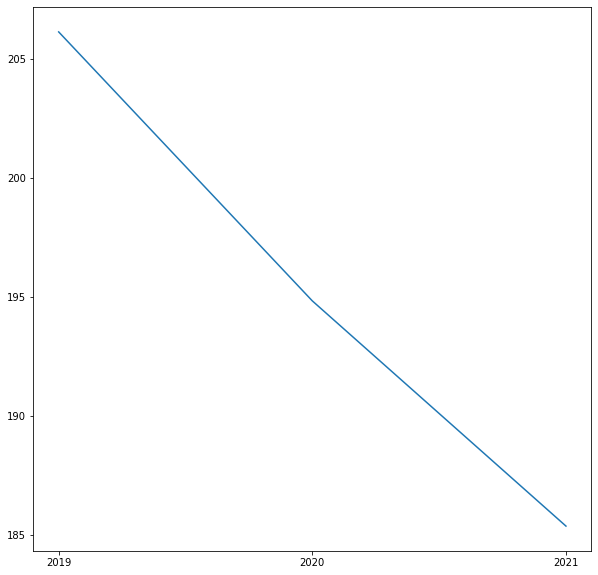

In [ ]:
graphPusbel = avgpertahun(df_PusBel,'ketersediaan_pkbm','tahun')
print(graphPusbel)
plt.figure(figsize=(10,10))
x=graphPusbel['tahun']
y=graphPusbel['ketersediaan_pkbm']
#plt.ylim(ymin=50,ymax=75)
df_plot = plt.plot(x,y)

Dapat diketahui bahwa dalam waktu 3 tahun, Jumlah pusat belajar tiap kabupaten/kota semakin menurun

## TREAT JUMLAH PERPUSTAKAAN

In [ ]:
df_Perpus.head(10)

,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,ketersediaan_tbm,tahun,id
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190006,WANAHERANG,32.01.02,GUNUNG PUTRI,32.01.02.2001,WANAHERANG,ADA,2019,1
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190010,BOJONG KULUR,32.01.02,GUNUNG PUTRI,32.01.02.2002,BOJONG KULUR,ADA,2019,2
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190009,CIANGSANA,32.01.02,GUNUNG PUTRI,32.01.02.2003,CIANGSANA,ADA,2019,3
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190002,GUNUNG PUTRI,32.01.02,GUNUNG PUTRI,32.01.02.2004,GUNUNG PUTRI,ADA,2019,4
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190004,BOJONG NANGKA,32.01.02,GUNUNG PUTRI,32.01.02.2005,BOJONG NANGKA,TIDAK ADA,2019,5
5,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190003,TLAJUNG UDIK,32.01.02,GUNUNG PUTRI,32.01.02.2006,TLAJUNG UDIK,TIDAK ADA,2019,6
6,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190005,CICADAS,32.01.02,GUNUNG PUTRI,32.01.02.2007,CICADAS,TIDAK ADA,2019,7
7,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190007,CIKEAS UDIK,32.01.02,GUNUNG PUTRI,32.01.02.2008,CIKEAS UDIK,TIDAK ADA,2019,8
8,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190008,NAGRAK,32.01.02,GUNUNG PUTRI,32.01.02.2009,NAGRAK,ADA,2019,9
9,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190001,KARANGGAN,32.01.02,GUNUNG PUTRI,32.01.02.2010,KARANGGAN,TIDAK ADA,2019,10


In [ ]:
Encode(df_Perpus,'ketersediaan_tbm')

,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,ketersediaan_tbm,tahun,id
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190006,WANAHERANG,32.01.02,GUNUNG PUTRI,32.01.02.2001,WANAHERANG,0,2019,1
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190010,BOJONG KULUR,32.01.02,GUNUNG PUTRI,32.01.02.2002,BOJONG KULUR,0,2019,2
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190009,CIANGSANA,32.01.02,GUNUNG PUTRI,32.01.02.2003,CIANGSANA,0,2019,3
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190002,GUNUNG PUTRI,32.01.02,GUNUNG PUTRI,32.01.02.2004,GUNUNG PUTRI,0,2019,4
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190004,BOJONG NANGKA,32.01.02,GUNUNG PUTRI,32.01.02.2005,BOJONG NANGKA,1,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,32,JAWA BARAT,3279,KOTA BANJAR,3279020,PURWAHARJA,3279020004,MEKARHARJA,32.79.03,PURWAHARJA,32.79.03.2003,MEKARHARJA,0,2021,15932
15932,32,JAWA BARAT,3279,KOTA BANJAR,3279040,LANGENSARI,3279040004,LANGENSARI,32.79.04,LANGENSARI,32.79.04.2001,LANGENSARI,0,2021,15933
15933,32,JAWA BARAT,3279,KOTA BANJAR,3279040,LANGENSARI,3279040003,REJASARI,32.79.04,LANGENSARI,32.79.04.2002,REJASARI,0,2021,15934
15934,32,JAWA BARAT,3279,KOTA BANJAR,3279040,LANGENSARI,3279040006,WARINGINSARI,32.79.04,LANGENSARI,32.79.04.2003,WARINGINSARI,0,2021,15935


In [ ]:
df_Perpus= aggsum(df_Perpus,'tahun','bps_nama_kabupaten_kota','ketersediaan_tbm')

In [ ]:
df_Perpus = changecol(df_Perpus,'bps_nama_kabupaten_kota')

In [ ]:
df_Perpus.head(10)

,tahun,kabupaten,ketersediaan_tbm
0,2019,KABUPATEN BANDUNG,111
1,2019,KABUPATEN BANDUNG BARAT,11
2,2019,KABUPATEN BEKASI,129
3,2019,KABUPATEN BOGOR,298
4,2019,KABUPATEN CIAMIS,107
5,2019,KABUPATEN CIANJUR,193
6,2019,KABUPATEN CIREBON,248
7,2019,KABUPATEN GARUT,233
8,2019,KABUPATEN INDRAMAYU,116
9,2019,KABUPATEN KARAWANG,175


**EDA Jumlah Perpustakaan**

  tahun  ketersediaan_tbm
0  2019        145.578947
1  2020        123.947368
2  2021        109.473684


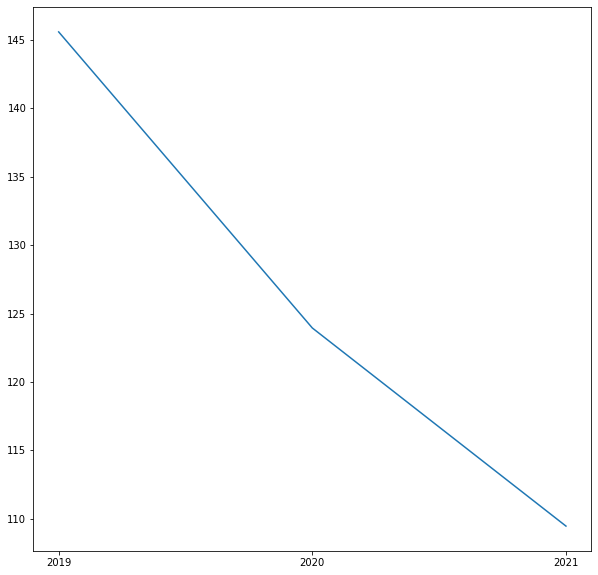

In [ ]:
graphPerPus = avgpertahun(df_Perpus,'ketersediaan_tbm','tahun')
print(graphPerPus)
plt.figure(figsize=(10,10))
x=graphPerPus['tahun']
y=graphPerPus['ketersediaan_tbm']
#plt.ylim(ymin=50,ymax=75)
df_plot = plt.plot(x,y)

Terdapat penurunan jumlah perpustakaan pertahunnya

In [ ]:
df_pusbel_perpus = pd.merge(df_PusBel,df_Perpus, on=['tahun','kabupaten'])
df_pusbel_perpus.head(10)

,tahun,kabupaten,ketersediaan_pkbm,ketersediaan_tbm
0,2019,KABUPATEN BANDUNG,161,111
1,2019,KABUPATEN BANDUNG BARAT,89,11
2,2019,KABUPATEN BEKASI,117,129
3,2019,KABUPATEN BOGOR,254,298
4,2019,KABUPATEN CIAMIS,182,107
5,2019,KABUPATEN CIANJUR,252,193
6,2019,KABUPATEN CIREBON,329,248
7,2019,KABUPATEN GARUT,315,233
8,2019,KABUPATEN INDRAMAYU,237,116
9,2019,KABUPATEN KARAWANG,224,175


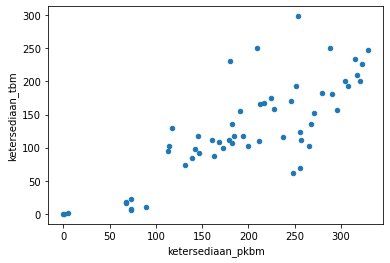

In [ ]:
df_pusbel_perpus.plot(kind='scatter', x='ketersediaan_pkbm', y='ketersediaan_tbm')

Semakin banyak pusat belajar maka meningkatnya jumlah perpustakaan , menunjukkan sekilas bahwa pemerintahan memperhatikan kedua hal tersebut dengan bersamaan, dan meningkatkan/menurunkannya secara bersama

## TREAT JUMLAH ANGKATAN KERJA

In [ ]:
df_AngkKerja= selectyear(df_AngkKerja,'tahun',2019)
df_AngkKerja.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_angkatan_kerja,satuan,tahun
185,186,32,JAWA BARAT,3201,KABUPATEN BOGOR,2791651,ORANG,2019
186,187,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,1120711,ORANG,2019
187,188,32,JAWA BARAT,3203,KABUPATEN CIANJUR,1081183,ORANG,2019
188,189,32,JAWA BARAT,3204,KABUPATEN BANDUNG,1786162,ORANG,2019
189,190,32,JAWA BARAT,3205,KABUPATEN GARUT,1155071,ORANG,2019
190,191,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,867603,ORANG,2019
191,192,32,JAWA BARAT,3207,KABUPATEN CIAMIS,624897,ORANG,2019
192,193,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,502051,ORANG,2019
193,194,32,JAWA BARAT,3209,KABUPATEN CIREBON,1064928,ORANG,2019
194,195,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,627874,ORANG,2019


In [ ]:
df_AngkKerja= aggsum(df_AngkKerja,'tahun','nama_kabupaten_kota','jumlah_angkatan_kerja')

In [ ]:
df_AngkKerja = changecol(df_AngkKerja,'nama_kabupaten_kota')

In [ ]:
df_AngkKerja.head(10)

,tahun,kabupaten,jumlah_angkatan_kerja
0,2019,KABUPATEN BANDUNG,1786162
1,2019,KABUPATEN BANDUNG BARAT,766961
2,2019,KABUPATEN BEKASI,1778133
3,2019,KABUPATEN BOGOR,2791651
4,2019,KABUPATEN CIAMIS,624897
5,2019,KABUPATEN CIANJUR,1081183
6,2019,KABUPATEN CIREBON,1064928
7,2019,KABUPATEN GARUT,1155071
8,2019,KABUPATEN INDRAMAYU,892360
9,2019,KABUPATEN KARAWANG,1121195


  tahun  jumlah_angkatan_kerja
0  2019          881646.518519
1  2020          896590.000000
2  2021          916430.666667


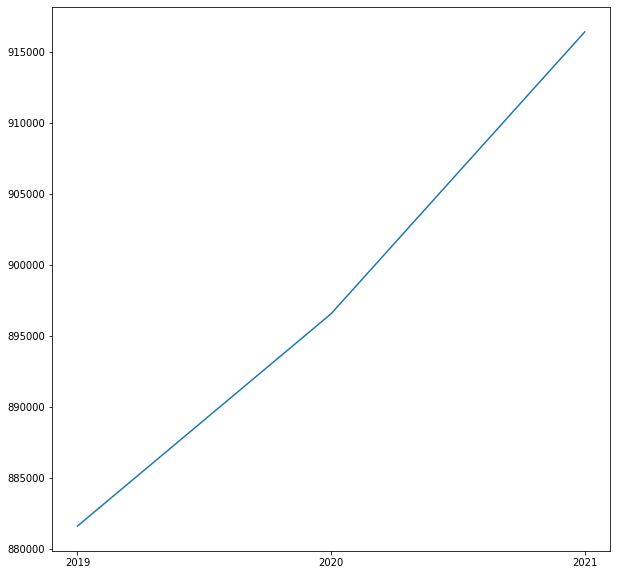

In [ ]:
graphAngkKerja = avgpertahun(df_AngkKerja,'jumlah_angkatan_kerja','tahun')
print(graphAngkKerja)
plt.figure(figsize=(10,10))
x=graphAngkKerja['tahun']
y=graphAngkKerja['jumlah_angkatan_kerja']
#plt.ylim(ymin=50,ymax=75)
df_plot = plt.plot(x,y)

Rata-rata jumlah angkatan kerja pertahunnya meningkat di provinsi jawa barat

In [ ]:
df_pusbel_perpus_angkkerja = pd.merge(df_PusBel,df_Perpus, on=['tahun','kabupaten'])
df_pusbel_perpus_angkkerja = pd.merge(df_pusbel_perpus_angkkerja,df_AngkKerja, on=['tahun','kabupaten'])
df_pusbel_perpus_angkkerja.head(10)

,tahun,kabupaten,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja
0,2019,KABUPATEN BANDUNG,161,111,1786162
1,2019,KABUPATEN BANDUNG BARAT,89,11,766961
2,2019,KABUPATEN BEKASI,117,129,1778133
3,2019,KABUPATEN BOGOR,254,298,2791651
4,2019,KABUPATEN CIAMIS,182,107,624897
5,2019,KABUPATEN CIANJUR,252,193,1081183
6,2019,KABUPATEN CIREBON,329,248,1064928
7,2019,KABUPATEN GARUT,315,233,1155071
8,2019,KABUPATEN INDRAMAYU,237,116,892360
9,2019,KABUPATEN KARAWANG,224,175,1121195


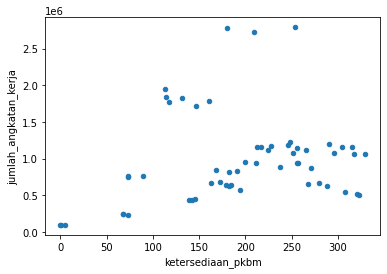

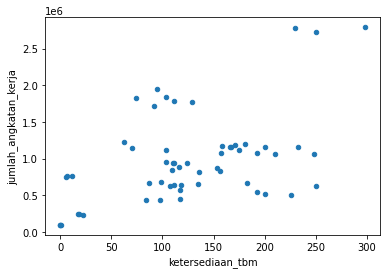

In [ ]:
df_pusbel_perpus_angkkerja.plot(kind='scatter', x='ketersediaan_pkbm', y='jumlah_angkatan_kerja')
df_pusbel_perpus_angkkerja.plot(kind='scatter', x='ketersediaan_tbm', y='jumlah_angkatan_kerja')

Terlihat trend bahwa ketersediaan pusat belajar dan ketersediaan perpustakaan dapat meningkatkan jumlah angkatan kerja pada daerah tersebut

## TREAT KEPADATAN PENDUDUK

In [ ]:
df_Kepadatan.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kepadatan_penduduk,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,1263,JIWA/KM2,2013
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,584,JIWA/KM2,2013
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,611,JIWA/KM2,2013
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,2013,JIWA/KM2,2013
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,700,JIWA/KM2,2013
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,604,JIWA/KM2,2013
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,584,JIWA/KM2,2013
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,914,JIWA/KM2,2013
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,1913,JIWA/KM2,2013
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,944,JIWA/KM2,2013


In [ ]:
df_Kepadatan= selectyear(df_Kepadatan,'tahun',2019)

In [ ]:
df_Kepadatan= aggsum(df_Kepadatan,'tahun','nama_kabupaten_kota','kepadatan_penduduk')

In [ ]:
df_Kepadatan = changecol(df_Kepadatan,'nama_kabupaten_kota')

In [ ]:
df_Kepadatan.head(10)

,tahun,kabupaten,kepadatan_penduduk
0,2019,KABUPATEN BANDUNG,2015
1,2019,KABUPATEN BANDUNG BARAT,1277
2,2019,KABUPATEN BEKASI,2184
3,2019,KABUPATEN BOGOR,1740
4,2019,KABUPATEN CIAMIS,886
5,2019,KABUPATEN CIANJUR,597
6,2019,KABUPATEN CIREBON,2224
7,2019,KABUPATEN GARUT,743
8,2019,KABUPATEN INDRAMAYU,912
9,2019,KABUPATEN KARAWANG,1406


**EDA Angkatan Kerja dan Kepadatan Penduduk**

In [ ]:
df_angkatankerja_kepadatan = pd.merge(df_Kepadatan,df_AngkKerja, on=['tahun','kabupaten'])
df_angkatankerja_kepadatan.head(10)

,tahun,kabupaten,kepadatan_penduduk,jumlah_angkatan_kerja
0,2019,KABUPATEN BANDUNG,2015,1786162
1,2019,KABUPATEN BANDUNG BARAT,1277,766961
2,2019,KABUPATEN BEKASI,2184,1778133
3,2019,KABUPATEN BOGOR,1740,2791651
4,2019,KABUPATEN CIAMIS,886,624897
5,2019,KABUPATEN CIANJUR,597,1081183
6,2019,KABUPATEN CIREBON,2224,1064928
7,2019,KABUPATEN GARUT,743,1155071
8,2019,KABUPATEN INDRAMAYU,912,892360
9,2019,KABUPATEN KARAWANG,1406,1121195


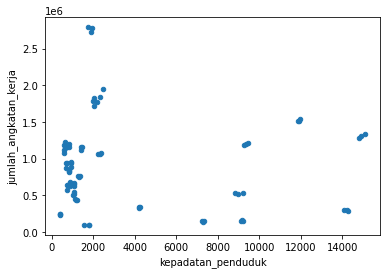

In [ ]:
df_angkatankerja_kepadatan.plot(kind='scatter', x='kepadatan_penduduk', y='jumlah_angkatan_kerja')

Terlihat sekilas bahwa kepadatan penduduk tidak mempengaruhi jumlah angkatan kerja pada daerah tersebut

In [ ]:
df_AngkKerja.loc[df_AngkKerja['tahun'] == 2021].sort_values(by=['jumlah_angkatan_kerja'],ascending=False).head(10)

,tahun,kabupaten,jumlah_angkatan_kerja
57,2021,KABUPATEN BOGOR,2786372
56,2021,KABUPATEN BEKASI,1953408
54,2021,KABUPATEN BANDUNG,1824927
74,2021,KOTA BEKASI,1544421
72,2021,KOTA BANDUNG,1339128
69,2021,KABUPATEN SUKABUMI,1222156
78,2021,KOTA DEPOK,1207111
61,2021,KABUPATEN GARUT,1200346
59,2021,KABUPATEN CIANJUR,1175885
63,2021,KABUPATEN KARAWANG,1161202


Nilai angkatan kerja tertinggi terdapat pada kabupaten bogor

## TREAT JARAK SEKOLAH

**Jarak Tempuh SD**

In [ ]:
df_JarakSD

,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,waktu_tempuh_sd_terdekat,satuan,tahun,id
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190006,WANAHERANG,32.01.02,GUNUNG PUTRI,32.01.02.2001,WANAHERANG,10,MENIT,2019,1
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190010,BOJONG KULUR,32.01.02,GUNUNG PUTRI,32.01.02.2002,BOJONG KULUR,5,MENIT,2019,2
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190009,CIANGSANA,32.01.02,GUNUNG PUTRI,32.01.02.2003,CIANGSANA,5,MENIT,2019,3
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190002,GUNUNG PUTRI,32.01.02,GUNUNG PUTRI,32.01.02.2004,GUNUNG PUTRI,5,MENIT,2019,4
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3201190004,BOJONG NANGKA,32.01.02,GUNUNG PUTRI,32.01.02.2005,BOJONG NANGKA,10,MENIT,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,32,JAWA BARAT,3279,KOTA BANJAR,3279020,PURWAHARJA,3279020004,MEKARHARJA,32.79.03,PURWAHARJA,32.79.03.2003,MEKARHARJA,1,MENIT,2021,15932
15932,32,JAWA BARAT,3279,KOTA BANJAR,3279040,LANGENSARI,3279040004,LANGENSARI,32.79.04,LANGENSARI,32.79.04.2001,LANGENSARI,1,MENIT,2021,15933
15933,32,JAWA BARAT,3279,KOTA BANJAR,3279040,LANGENSARI,3279040003,REJASARI,32.79.04,LANGENSARI,32.79.04.2002,REJASARI,2,MENIT,2021,15934
15934,32,JAWA BARAT,3279,KOTA BANJAR,3279040,LANGENSARI,3279040006,WARINGINSARI,32.79.04,LANGENSARI,32.79.04.2003,WARINGINSARI,2,MENIT,2021,15935


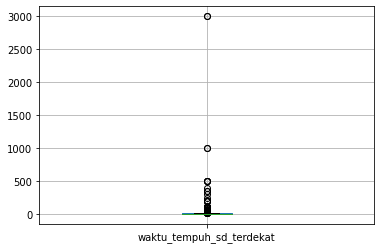

In [ ]:
boxplot = df_JarakSD.boxplot(column=['waktu_tempuh_sd_terdekat'])

Terdapat beberapa data outlier yang memang tidak logis karena waktu tempuh ke sekolah mencapai 3000 menit.

Gunakan nilai Z score, dalam kasus ini kita gunakan dengan angka 3, yang menunjukkan data yang diambil adalah di bawah 3 standard deviasi (positif)

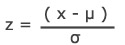

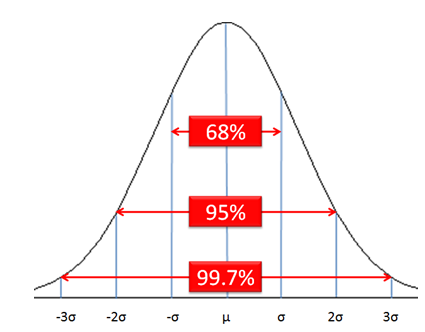

Source: https://sixsigmastudyguide.com/z-scores-z-table-z-transformations/

In [ ]:
df_JarakSD_treat= df_JarakSD[(np.abs(stats.zscore(df_JarakSD['waktu_tempuh_sd_terdekat'])) < 3)]

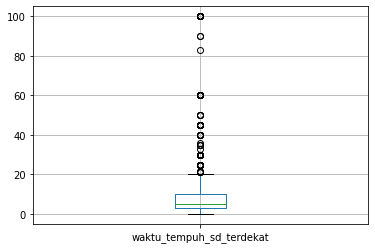

In [ ]:
boxplot = df_JarakSD_treat.boxplot(column=['waktu_tempuh_sd_terdekat'])

Dapat terlihat bahwa jarak waktu tempuh maksimum adalah 100 menit, secara realita hal ini masih bisa diterima

In [ ]:
df_JarakSD = df_JarakSD_treat

In [ ]:
df_JarakSD= aggaverage(df_JarakSD,'tahun','bps_nama_kabupaten_kota','waktu_tempuh_sd_terdekat')
df_JarakSD= changecol(df_JarakSD,'bps_nama_kabupaten_kota')
df_JarakSD.head(10)

,tahun,kabupaten,waktu_tempuh_sd_terdekat
0,2019,KABUPATEN BANDUNG,6.055762
1,2019,KABUPATEN BANDUNG BARAT,6.206061
2,2019,KABUPATEN BEKASI,8.144444
3,2019,KABUPATEN BOGOR,7.141827
4,2019,KABUPATEN CIAMIS,5.735409
5,2019,KABUPATEN CIANJUR,7.320113
6,2019,KABUPATEN CIREBON,6.260976
7,2019,KABUPATEN GARUT,7.619048
8,2019,KABUPATEN INDRAMAYU,4.669903
9,2019,KABUPATEN KARAWANG,6.026936


**Jarak Tempuh SMP**

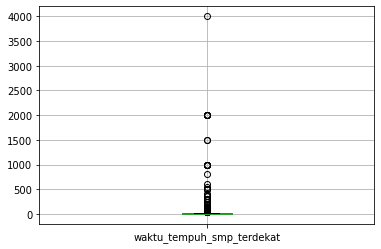

In [ ]:
boxplot = df_JarakSMP.boxplot(column=['waktu_tempuh_smp_terdekat'])

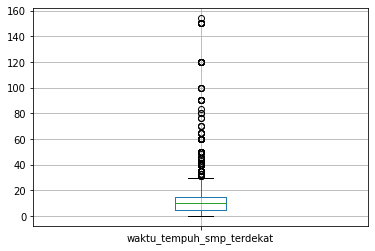

In [ ]:
df_JarakSMP_treat= df_JarakSMP[(np.abs(stats.zscore(df_JarakSMP['waktu_tempuh_smp_terdekat'])) < 3)]
boxplot = df_JarakSMP_treat.boxplot(column=['waktu_tempuh_smp_terdekat'])

Terlihat bahwa waktu tempuh smp masih dapat diterima (<160 menit)

In [ ]:
df_JarakSMP = df_JarakSMP_treat

In [ ]:
df_JarakSMP= aggaverage(df_JarakSMP,'tahun','bps_nama_kabupaten_kota','waktu_tempuh_smp_terdekat')
df_JarakSMP= changecol(df_JarakSMP,'bps_nama_kabupaten_kota')
df_JarakSMP.head(10)

,tahun,kabupaten,waktu_tempuh_smp_terdekat
0,2019.0,KABUPATEN BANDUNG,10.744444
1,2019.0,KABUPATEN BANDUNG BARAT,10.079268
2,2019.0,KABUPATEN BEKASI,12.224719
3,2019.0,KABUPATEN BOGOR,10.615385
4,2019.0,KABUPATEN CIAMIS,9.197674
5,2019.0,KABUPATEN CIANJUR,12.269341
6,2019.0,KABUPATEN CIREBON,9.364078
7,2019.0,KABUPATEN GARUT,11.680191
8,2019.0,KABUPATEN INDRAMAYU,7.258900
9,2019.0,KABUPATEN KARAWANG,9.397306


**Jarak tempuh SMA**

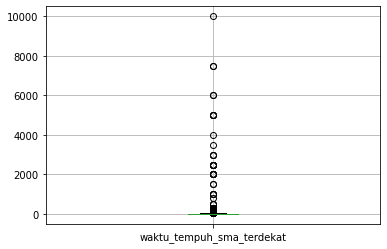

In [ ]:
boxplot = df_JarakSMA.boxplot(column=['waktu_tempuh_sma_terdekat'])

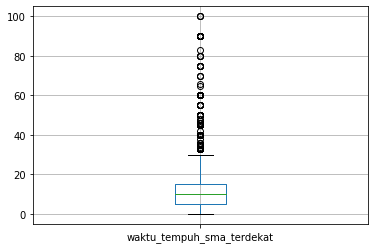

In [ ]:
df_JarakSMA_treat= df_JarakSMA[(np.abs(stats.zscore(df_JarakSMA['waktu_tempuh_sma_terdekat'])) < 0.5)]
boxplot = df_JarakSMA_treat.boxplot(column=['waktu_tempuh_sma_terdekat'])

In [ ]:
df_JarakSMA_treat['waktu_tempuh_sma_terdekat']

0        20.0
1         6.0
2        10.0
3        20.0
4        10.0
         ... 
15931     5.0
15932     4.0
15933     5.0
15934     2.0
15935     5.0
Name: waktu_tempuh_sma_terdekat, Length: 15864, dtype: float64

Terlihat bahwa waktu tempuh masih dapat diterima (<100 menit)

In [ ]:
df_JarakSMA = df_JarakSMA_treat

In [ ]:
df_JarakSMA= aggaverage(df_JarakSMA,'tahun','bps_nama_kabupaten_kota','waktu_tempuh_sma_terdekat')
df_JarakSMA= changecol(df_JarakSMA,'bps_nama_kabupaten_kota')
df_JarakSMA.head(10)

,tahun,kabupaten,waktu_tempuh_sma_terdekat
0,2019,KABUPATEN BANDUNG,14.003704
1,2019,KABUPATEN BANDUNG BARAT,13.400000
2,2019,KABUPATEN BEKASI,13.584270
3,2019,KABUPATEN BOGOR,11.794189
4,2019,KABUPATEN CIAMIS,10.311284
5,2019,KABUPATEN CIANJUR,13.418338
6,2019,KABUPATEN CIREBON,9.090024
7,2019,KABUPATEN GARUT,12.480861
8,2019,KABUPATEN INDRAMAYU,7.253247
9,2019,KABUPATEN KARAWANG,12.613559


In [ ]:
df_jarak = pd.merge(df_JarakSD,df_JarakSMP, on=['tahun','kabupaten'])
df_jarak = pd.merge(df_jarak,df_JarakSMA, on=['tahun','kabupaten'])
df_jarak.head(10)

,tahun,kabupaten,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat
0,2019,KABUPATEN BANDUNG,6.055762,10.744444,14.003704
1,2019,KABUPATEN BANDUNG BARAT,6.206061,10.079268,13.400000
2,2019,KABUPATEN BEKASI,8.144444,12.224719,13.584270
3,2019,KABUPATEN BOGOR,7.141827,10.615385,11.794189
4,2019,KABUPATEN CIAMIS,5.735409,9.197674,10.311284
5,2019,KABUPATEN CIANJUR,7.320113,12.269341,13.418338
6,2019,KABUPATEN CIREBON,6.260976,9.364078,9.090024
7,2019,KABUPATEN GARUT,7.619048,11.680191,12.480861
8,2019,KABUPATEN INDRAMAYU,4.669903,7.258900,7.253247
9,2019,KABUPATEN KARAWANG,6.026936,9.397306,12.613559


In [ ]:
df_test_jarak = pd.merge(df_jarak,df_IP, on=['tahun','kabupaten'])
df_test_jarak.head(10)

,tahun,kabupaten,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,indeks_pendidikan
0,2019,KABUPATEN BANDUNG,6.055762,10.744444,14.003704,64.52
1,2019,KABUPATEN BANDUNG BARAT,6.206061,10.079268,13.400000,60.21
2,2019,KABUPATEN BEKASI,8.144444,12.224719,13.584270,65.80
3,2019,KABUPATEN BOGOR,7.141827,10.615385,11.794189,62.27
4,2019,KABUPATEN CIAMIS,5.735409,9.197674,10.311284,63.94
5,2019,KABUPATEN CIANJUR,7.320113,12.269341,13.418338,56.51
6,2019,KABUPATEN CIREBON,6.260976,9.364078,9.090024,56.37
7,2019,KABUPATEN GARUT,7.619048,11.680191,12.480861,57.87
8,2019,KABUPATEN INDRAMAYU,4.669903,7.258900,7.253247,53.97
9,2019,KABUPATEN KARAWANG,6.026936,9.397306,12.613559,59.06


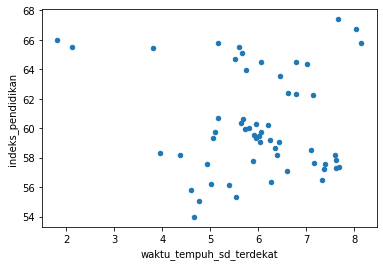

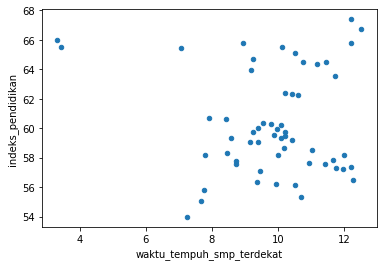

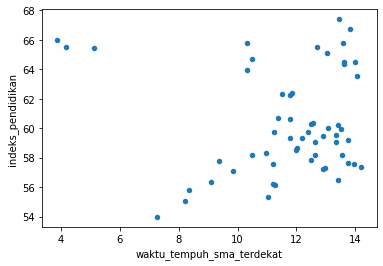

In [ ]:
df_test_jarak.plot(kind='scatter', x='waktu_tempuh_sd_terdekat', y='indeks_pendidikan')
df_test_jarak.plot(kind='scatter', x='waktu_tempuh_smp_terdekat', y='indeks_pendidikan')
df_test_jarak.plot(kind='scatter', x='waktu_tempuh_sma_terdekat', y='indeks_pendidikan')

Dari waktu tempuh, telihat sekilas bahwa waku tempuh yang lebih lama, mempunyai trend nilai indeks pendidikan yang tinggi juga



## TREAT JUMLAH SEKOLAH

In [ ]:
#Mengubah bentuk data menjadi format yang diinginkan untuk sumber BPS
def treatdatabps(df, nilai):
  df = df.dropna()
  df = df[df['Wilayah Jawa Barat'] != 'Provinsi Jawa Barat']
  df = df.reset_index()
  del df['index']
  df.drop(df.columns[[1,2,3,4,5,6]],axis=1,inplace=True)
  df = df.rename(columns={'Wilayah Jawa Barat':'kabupaten','Unnamed: 7': 2019,'Unnamed: 8':2020,'Unnamed: 9':2021})
  df['kabupaten'][:18] = 'KABUPATEN'+ ' ' + df['kabupaten'][:18].astype(str)
  df['kabupaten']= df['kabupaten'].str.upper()
  df= df.melt(id_vars='kabupaten',var_name='tahun',value_name=nilai)
  return(df)

In [ ]:
def ubahformatint(df, kolum):
  df[kolum]= df[kolum].astype(int)
  return df

**Jumlah SD**

In [ ]:
df_JumlahSD

,Wilayah Jawa Barat,Jumlah Sekolah Dasar,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Negeri,NaN,NaN,Swasta,NaN,NaN,Jumlah,NaN,NaN
1,NaN,2019,2020.0,2021.0,2019,2020.0,2021.0,2019,2020.0,2021.0
2,Provinsi Jawa Barat,17694,17492.0,17424.0,1913,2085.0,2215.0,19607,19577.0,19639.0
3,Bogor,1543,1543.0,1537.0,280,307.0,310.0,1823,1850.0,1847.0
4,Sukabumi,1166,1163.0,1151.0,45,53.0,62.0,1211,1216.0,1213.0
5,Cianjur,1228,1209.0,1209.0,28,32.0,40.0,1256,1241.0,1249.0
6,Bandung,1313,1304.0,1304.0,93,105.0,107.0,1406,1409.0,1411.0
7,Garut,1487,1454.0,1454.0,97,100.0,104.0,1584,1554.0,1558.0
8,Tasikmalaya,1070,1070.0,1070.0,16,18.0,20.0,1086,1088.0,1090.0
9,Ciamis,741,741.0,740.0,4,4.0,5.0,745,745.0,745.0


In [ ]:
df_JumlahSD = treatdatabps(df_JumlahSD,'Jumlah SD')
df_JumlahSD = ubahformatint(df_JumlahSD,'Jumlah SD')
df_JumlahSD.head(10)

<ipython-input-90-cfef9a737738>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kabupaten'][:18] = 'KABUPATEN'+ ' ' + df['kabupaten'][:18].astype(str)


,kabupaten,tahun,Jumlah SD
0,KABUPATEN BOGOR,2019,1823
1,KABUPATEN SUKABUMI,2019,1211
2,KABUPATEN CIANJUR,2019,1256
3,KABUPATEN BANDUNG,2019,1406
4,KABUPATEN GARUT,2019,1584
5,KABUPATEN TASIKMALAYA,2019,1086
6,KABUPATEN CIAMIS,2019,745
7,KABUPATEN KUNINGAN,2019,652
8,KABUPATEN CIREBON,2019,921
9,KABUPATEN MAJALENGKA,2019,667


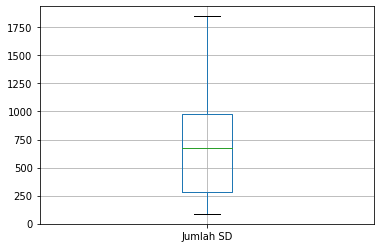

In [ ]:
boxplot = df_JumlahSD.boxplot(column=['Jumlah SD'])

**Jumlah SMP**

In [ ]:
df_JumlahSMP.head(10)

,Wilayah Jawa Barat,Jumlah Sekolah Menengah Pertama (SMP),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Negeri,NaN,NaN,Swasta,NaN,NaN,Jumlah,NaN,NaN
1,NaN,2019,2020.0,2021.0,2019,2020.0,2021.0,2019,2020.0,2021.0
2,Provinsi Jawa Barat,1929,1940.0,1969.0,3284,3516.0,3715.0,5213,5456.0,5684.0
3,Bogor,103,103.0,103.0,587,610.0,621.0,690,713.0,724.0
4,Sukabumi,162,162.0,162.0,168,188.0,194.0,330,350.0,356.0
5,Cianjur,151,152.0,155.0,163,198.0,237.0,314,350.0,392.0
6,Bandung,77,77.0,77.0,245,259.0,261.0,322,336.0,338.0
7,Garut,145,145.0,145.0,236,257.0,268.0,381,402.0,413.0
8,Tasikmalaya,137,137.0,137.0,122,131.0,145.0,259,268.0,282.0
9,Ciamis,80,80.0,80.0,41,48.0,51.0,121,128.0,131.0


In [ ]:
df_JumlahSMP = treatdatabps(df_JumlahSMP,'Jumlah SMP')
df_JumlahSMP = ubahformatint(df_JumlahSMP,'Jumlah SMP')
df_JumlahSMP.head(10)

<ipython-input-90-cfef9a737738>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kabupaten'][:18] = 'KABUPATEN'+ ' ' + df['kabupaten'][:18].astype(str)


,kabupaten,tahun,Jumlah SMP
0,KABUPATEN BOGOR,2019,690
1,KABUPATEN SUKABUMI,2019,330
2,KABUPATEN CIANJUR,2019,314
3,KABUPATEN BANDUNG,2019,322
4,KABUPATEN GARUT,2019,381
5,KABUPATEN TASIKMALAYA,2019,259
6,KABUPATEN CIAMIS,2019,121
7,KABUPATEN KUNINGAN,2019,103
8,KABUPATEN CIREBON,2019,187
9,KABUPATEN MAJALENGKA,2019,104


**Jumlah SMA**

In [ ]:
df_JumlahSMA.head(10)

,Wilayah Jawa Barat,Jumlah Sekolah Menengah Atas,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Negeri,NaN,NaN,Swasta,NaN,NaN,Jumlah,NaN,NaN
1,NaN,2019,2020.0,2021.0,2019,2020.0,2021.0,2019,2020.0,2021.0
2,Provinsi Jawa Barat,501,511.0,512.0,1114,1137.0,1155.0,1615,1648.0,1667.0
3,Bogor,44,45.0,45.0,139,144.0,147.0,183,189.0,192.0
4,Sukabumi,26,27.0,27.0,52,56.0,56.0,78,83.0,83.0
5,Cianjur,18,18.0,18.0,74,76.0,77.0,92,94.0,95.0
6,Bandung,19,19.0,19.0,89,90.0,90.0,108,109.0,109.0
7,Garut,32,32.0,32.0,92,94.0,95.0,124,126.0,127.0
8,Tasikmalaya,18,18.0,18.0,49,50.0,53.0,67,68.0,71.0
9,Ciamis,17,17.0,17.0,10,12.0,14.0,27,29.0,31.0


In [ ]:
df_JumlahSMA = treatdatabps(df_JumlahSMA,'Jumlah SMA')
df_JumlahSMA = ubahformatint(df_JumlahSMA,'Jumlah SMA')
df_JumlahSMA.head(10)

<ipython-input-90-cfef9a737738>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kabupaten'][:18] = 'KABUPATEN'+ ' ' + df['kabupaten'][:18].astype(str)


,kabupaten,tahun,Jumlah SMA
0,KABUPATEN BOGOR,2019,183
1,KABUPATEN SUKABUMI,2019,78
2,KABUPATEN CIANJUR,2019,92
3,KABUPATEN BANDUNG,2019,108
4,KABUPATEN GARUT,2019,124
5,KABUPATEN TASIKMALAYA,2019,67
6,KABUPATEN CIAMIS,2019,27
7,KABUPATEN KUNINGAN,2019,28
8,KABUPATEN CIREBON,2019,47
9,KABUPATEN MAJALENGKA,2019,22


**Jumlah SMK**

In [ ]:
df_JumlahSMK

,Wilayah Jawa Barat,Jumlah Sekolah Menengah Kejuruan,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Negeri,NaN,NaN,Swasta,NaN,NaN,Jumlah,NaN,NaN
1,NaN,2019,2020.0,2021.0,2019,2020.0,2021.0,2019,2020.0,2021.0
2,Provinsi Jawa Barat,11,288.0,288.0,347,2610.0,2619.0,358,2898.0,2907.0
3,Bogor,11,11.0,11.0,149,348.0,347.0,160,359.0,358.0
4,Sukabumi,28,11.0,11.0,155,151.0,152.0,183,162.0,163.0
5,Cianjur,11,28.0,28.0,128,158.0,158.0,139,186.0,186.0
6,Bandung,15,11.0,11.0,164,127.0,128.0,179,138.0,139.0
7,Garut,13,15.0,15.0,123,162.0,162.0,136,177.0,177.0
8,Tasikmalaya,8,14.0,14.0,61,122.0,122.0,69,136.0,136.0
9,Ciamis,9,8.0,8.0,35,62.0,62.0,44,70.0,70.0


Terdapat data '-', ubah menjadi jumlah sesuai tahun berikutnya

In [ ]:
df_JumlahSMK['Unnamed: 7'] = df_JumlahSMK['Unnamed: 7'].replace({'-':31})

In [ ]:
df_JumlahSMK = treatdatabps(df_JumlahSMK,'Jumlah SMK')
df_JumlahSMK = ubahformatint(df_JumlahSMK,'Jumlah SMK')
df_JumlahSMK.head(10)

<ipython-input-90-cfef9a737738>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kabupaten'][:18] = 'KABUPATEN'+ ' ' + df['kabupaten'][:18].astype(str)


,kabupaten,tahun,Jumlah SMK
0,KABUPATEN BOGOR,2019,160
1,KABUPATEN SUKABUMI,2019,183
2,KABUPATEN CIANJUR,2019,139
3,KABUPATEN BANDUNG,2019,179
4,KABUPATEN GARUT,2019,136
5,KABUPATEN TASIKMALAYA,2019,69
6,KABUPATEN CIAMIS,2019,44
7,KABUPATEN KUNINGAN,2019,108
8,KABUPATEN CIREBON,2019,56
9,KABUPATEN MAJALENGKA,2019,90


In [ ]:
df_jumlahsekolah = pd.merge(df_JumlahSD,df_JumlahSMP, on=['tahun','kabupaten'])
df_jumlahsekolah = pd.merge(df_jumlahsekolah,df_JumlahSMA, on=['tahun','kabupaten'])
df_jumlahsekolah = pd.merge(df_jumlahsekolah,df_JumlahSMK, on=['tahun','kabupaten'])
df_jumlahsekolah.head(10)

,kabupaten,tahun,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK
0,KABUPATEN BOGOR,2019,1823,690,183,160
1,KABUPATEN SUKABUMI,2019,1211,330,78,183
2,KABUPATEN CIANJUR,2019,1256,314,92,139
3,KABUPATEN BANDUNG,2019,1406,322,108,179
4,KABUPATEN GARUT,2019,1584,381,124,136
5,KABUPATEN TASIKMALAYA,2019,1086,259,67,69
6,KABUPATEN CIAMIS,2019,745,121,27,44
7,KABUPATEN KUNINGAN,2019,652,103,28,108
8,KABUPATEN CIREBON,2019,921,187,47,56
9,KABUPATEN MAJALENGKA,2019,667,104,22,90


**EDA Jumlah Sekolah**

In [ ]:
df_jumlahsekolah.loc[df_jumlahsekolah['kabupaten']=='KABUPATEN BOGOR']

,kabupaten,tahun,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK
0,KABUPATEN BOGOR,2019,1823,690,183,160
27,KABUPATEN BOGOR,2020,1850,713,189,359
54,KABUPATEN BOGOR,2021,1847,724,192,358


sekilas dari data ini dapat terlihat bahwa jumlah SD fluktuasi, jumlah smp terus bertambah, jumlah sma terus bertambah, dan jumlah SMK yang juga cukup signifikan bertambah pada tahun 2019 ke 2020

## TREAT GURU SEKOLAH

**Jumlah Guru SD**

In [ ]:
df_GuruSD

,Wilayah Jawa Barat,Jumlah Guru Sekolah Dasar,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Negeri,NaN,NaN,Swasta,NaN,NaN,Jumlah,NaN,NaN
1,NaN,2019,2020.0,2021.0,2019,2020.0,2021.0,2019,2020.0,2021.0
2,Provinsi Jawa Barat,197311,189113.0,175714.0,9618,32142.0,33972.0,206929,221255.0,209686.0
3,Bogor,18320,16482.0,15581.0,634,4377.0,4267.0,18954,20859.0,19848.0
4,Sukabumi,8955,9466.0,8658.0,370,594.0,642.0,9325,10060.0,9300.0
5,Cianjur,11222,11901.0,10994.0,334,378.0,424.0,11556,12279.0,11418.0
6,Bandung,14044,14230.0,13318.0,723,1536.0,1693.0,14767,15766.0,15011.0
7,Garut,12024,12454.0,11550.0,273,973.0,999.0,12297,13427.0,12549.0
8,Tasikmalaya,8132,9011.0,8377.0,281,173.0,189.0,8413,9184.0,8566.0
9,Ciamis,6186,6816.0,6199.0,195,48.0,61.0,6381,6864.0,6260.0


In [ ]:
df_GuruSD = treatdatabps(df_GuruSD,'Jumlah Guru SD')
df_GuruSD = ubahformatint(df_GuruSD,'Jumlah Guru SD')
df_GuruSD.head(10)

<ipython-input-90-cfef9a737738>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kabupaten'][:18] = 'KABUPATEN'+ ' ' + df['kabupaten'][:18].astype(str)


,kabupaten,tahun,Jumlah Guru SD
0,KABUPATEN BOGOR,2019,18954
1,KABUPATEN SUKABUMI,2019,9325
2,KABUPATEN CIANJUR,2019,11556
3,KABUPATEN BANDUNG,2019,14767
4,KABUPATEN GARUT,2019,12297
5,KABUPATEN TASIKMALAYA,2019,8413
6,KABUPATEN CIAMIS,2019,6381
7,KABUPATEN KUNINGAN,2019,6431
8,KABUPATEN CIREBON,2019,9217
9,KABUPATEN MAJALENGKA,2019,6340


**Jumlah Guru SMP**

In [ ]:
df_GuruSMP.head(10)

,Wilayah Jawa Barat,Jumlah Guru Sekolah Menengah Pertama,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Negeri,NaN,NaN,Swasta,NaN,NaN,Jumlah,NaN,NaN
1,NaN,2019,2020.0,2021.0,2019,2020.0,2021.0,2019,2020.0,2021.0
2,Provinsi Jawa Barat,85396,54819.0,54222.0,15194,41638.0,41217.0,100590,96457.0,95439.0
3,Bogor,8374,2949.0,3019.0,1200,6690.0,6570.0,9574,9639.0,9589.0
4,Sukabumi,3916,2554.0,2642.0,660,1780.0,1780.0,4576,4334.0,4422.0
5,Cianjur,4328,2929.0,2854.0,651,2149.0,2137.0,4979,5078.0,4991.0
6,Bandung,5779,3101.0,3007.0,949,3623.0,3450.0,6728,6724.0,6457.0
7,Garut,5146,3480.0,3541.0,784,2358.0,2298.0,5930,5838.0,5839.0
8,Tasikmalaya,3807,2680.0,2619.0,596,1457.0,1507.0,4403,4137.0,4126.0
9,Ciamis,2373,1926.0,1889.0,451,612.0,554.0,2824,2538.0,2443.0


In [ ]:
df_GuruSMP = treatdatabps(df_GuruSMP,'Jumlah Guru SMP')
df_GuruSMP = ubahformatint(df_GuruSMP,'Jumlah Guru SMP')
df_GuruSMP.head(10)

<ipython-input-90-cfef9a737738>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kabupaten'][:18] = 'KABUPATEN'+ ' ' + df['kabupaten'][:18].astype(str)


,kabupaten,tahun,Jumlah Guru SMP
0,KABUPATEN BOGOR,2019,9574
1,KABUPATEN SUKABUMI,2019,4576
2,KABUPATEN CIANJUR,2019,4979
3,KABUPATEN BANDUNG,2019,6728
4,KABUPATEN GARUT,2019,5930
5,KABUPATEN TASIKMALAYA,2019,4403
6,KABUPATEN CIAMIS,2019,2824
7,KABUPATEN KUNINGAN,2019,2915
8,KABUPATEN CIREBON,2019,4974
9,KABUPATEN MAJALENGKA,2019,2750


**Jumlah Guru SMA**

In [ ]:
df_GuruSMA.head(10)

,Wilayah Jawa Barat,Jumlah Guru Sekolah Menengah Atas,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Negeri,NaN,NaN,Swasta,NaN,NaN,Jumlah,NaN,NaN
1,NaN,2019,2020.0,2021.0,2019,2020.0,2021.0,2019,2020.0,2021.0
2,Provinsi Jawa Barat,35460,22326.0,22324.0,7595,16654.0,15697.0,43055,38980.0,38021.0
3,Bogor,3125,1781.0,1809.0,482,1926.0,1862.0,3607,3707.0,3671.0
4,Sukabumi,1352,861.0,996.0,346,726.0,664.0,1698,1587.0,1660.0
5,Cianjur,1335,665.0,701.0,270,894.0,821.0,1605,1559.0,1522.0
6,Bandung,2305,1093.0,1052.0,450,1516.0,1442.0,2755,2609.0,2494.0
7,Garut,2144,1363.0,1422.0,600,959.0,923.0,2744,2322.0,2345.0
8,Tasikmalaya,1167,687.0,723.0,245,674.0,666.0,1412,1361.0,1389.0
9,Ciamis,826,725.0,734.0,206,177.0,161.0,1032,902.0,895.0


In [ ]:
df_GuruSMA = treatdatabps(df_GuruSMA,'Jumlah Guru SMA')
df_GuruSMA = ubahformatint(df_GuruSMA,'Jumlah Guru SMA')
df_GuruSMA.head(10)

<ipython-input-90-cfef9a737738>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kabupaten'][:18] = 'KABUPATEN'+ ' ' + df['kabupaten'][:18].astype(str)


,kabupaten,tahun,Jumlah Guru SMA
0,KABUPATEN BOGOR,2019,3607
1,KABUPATEN SUKABUMI,2019,1698
2,KABUPATEN CIANJUR,2019,1605
3,KABUPATEN BANDUNG,2019,2755
4,KABUPATEN GARUT,2019,2744
5,KABUPATEN TASIKMALAYA,2019,1412
6,KABUPATEN CIAMIS,2019,1032
7,KABUPATEN KUNINGAN,2019,1239
8,KABUPATEN CIREBON,2019,1450
9,KABUPATEN MAJALENGKA,2019,1002


**Jumlah Guru SMK**

In [ ]:
df_GuruSMK.head(10)

,Wilayah Jawa Barat,Jumlah Guru Sekolah Menengah Kejuruan,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Negeri,NaN,NaN,Swasta,NaN,NaN,Jumlah,NaN,NaN
1,NaN,2019,2020.0,2021.0,2019,2020.0,2021.0,2019,2020.0,2021.0
2,Provinsi Jawa Barat,51478,15630.0,15960.0,9436,43888.0,42169.0,60914,59518.0,58129.0
3,Bogor,4646,490.0,546.0,677,5256.0,5097.0,5323,5746.0,5643.0
4,Sukabumi,1893,427.0,446.0,328,1967.0,1938.0,2221,2394.0,2384.0
5,Cianjur,2715,1129.0,1157.0,452,2120.0,1968.0,3167,3249.0,3125.0
6,Bandung,2532,624.0,611.0,454,2455.0,2302.0,2986,3079.0,2913.0
7,Garut,2962,941.0,979.0,636,2472.0,2324.0,3598,3413.0,3303.0
8,Tasikmalaya,2424,609.0,627.0,349,2241.0,2179.0,2773,2850.0,2806.0
9,Ciamis,1333,427.0,423.0,267,1054.0,1025.0,1600,1481.0,1448.0


In [ ]:
df_GuruSMK = treatdatabps(df_GuruSMK,'Jumlah Guru SMK')
df_GuruSMK = ubahformatint(df_GuruSMK,'Jumlah Guru SMK')
df_GuruSMK.head(10)

<ipython-input-90-cfef9a737738>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kabupaten'][:18] = 'KABUPATEN'+ ' ' + df['kabupaten'][:18].astype(str)


,kabupaten,tahun,Jumlah Guru SMK
0,KABUPATEN BOGOR,2019,5323
1,KABUPATEN SUKABUMI,2019,2221
2,KABUPATEN CIANJUR,2019,3167
3,KABUPATEN BANDUNG,2019,2986
4,KABUPATEN GARUT,2019,3598
5,KABUPATEN TASIKMALAYA,2019,2773
6,KABUPATEN CIAMIS,2019,1600
7,KABUPATEN KUNINGAN,2019,1912
8,KABUPATEN CIREBON,2019,2827
9,KABUPATEN MAJALENGKA,2019,1722


In [ ]:
df_Guru = pd.merge(df_GuruSD,df_GuruSMP, on=['tahun','kabupaten'])
df_Guru = pd.merge(df_Guru,df_GuruSMA, on=['tahun','kabupaten'])
df_Guru = pd.merge(df_Guru,df_GuruSMK, on=['tahun','kabupaten'])
df_Guru.head(10)

,kabupaten,tahun,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK
0,KABUPATEN BOGOR,2019,18954,9574,3607,5323
1,KABUPATEN SUKABUMI,2019,9325,4576,1698,2221
2,KABUPATEN CIANJUR,2019,11556,4979,1605,3167
3,KABUPATEN BANDUNG,2019,14767,6728,2755,2986
4,KABUPATEN GARUT,2019,12297,5930,2744,3598
5,KABUPATEN TASIKMALAYA,2019,8413,4403,1412,2773
6,KABUPATEN CIAMIS,2019,6381,2824,1032,1600
7,KABUPATEN KUNINGAN,2019,6431,2915,1239,1912
8,KABUPATEN CIREBON,2019,9217,4974,1450,2827
9,KABUPATEN MAJALENGKA,2019,6340,2750,1002,1722


**EDA Jumlah Guru**

In [ ]:
df_Guru.loc[df_Guru['kabupaten']=='KABUPATEN BOGOR']

,kabupaten,tahun,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK
0,KABUPATEN BOGOR,2019,18954,9574,3607,5323
27,KABUPATEN BOGOR,2020,20859,9639,3707,5746
54,KABUPATEN BOGOR,2021,19848,9589,3671,5643


Jumlah guru juga naik dan turun tiap jenis sekolah per tahunnya

## TREAT GARIS KEMISKINAN

In [ ]:
df_GarisMiskin

,Wilayah Jawa Barat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan),Unnamed: 2,Unnamed: 3
0,NaN,2019.0,2020.0,2021.0
1,Provinsi Jawa Barat,386198.0,410988.0,427402.0
2,Bogor,373799.0,402877.0,418483.0
3,Sukabumi,309676.0,328284.0,342094.0
4,Cianjur,350760.0,371699.0,387631.0
5,Bandung,345177.0,367403.0,378819.0
6,Garut,301202.0,310437.0,320050.0
7,Tasikmalaya,311848.0,323880.0,333909.0
8,Ciamis,363750.0,378108.0,389676.0
9,Kuningan,340775.0,352358.0,358069.0


In [ ]:
df_GarisMiskin = df_GarisMiskin.drop(labels=[0,1,29,30,31,32], axis=0)
df_GarisMiskin = df_GarisMiskin.reset_index()
del df_GarisMiskin['index']

In [ ]:
df_GarisMiskin

,Wilayah Jawa Barat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan),Unnamed: 2,Unnamed: 3
0,Bogor,373799.0,402877.0,418483.0
1,Sukabumi,309676.0,328284.0,342094.0
2,Cianjur,350760.0,371699.0,387631.0
3,Bandung,345177.0,367403.0,378819.0
4,Garut,301202.0,310437.0,320050.0
5,Tasikmalaya,311848.0,323880.0,333909.0
6,Ciamis,363750.0,378108.0,389676.0
7,Kuningan,340775.0,352358.0,358069.0
8,Cirebon,381372.0,393452.0,404635.0
9,Majalengka,445184.0,453201.0,466813.0


In [ ]:
df_GarisMiskin = df_GarisMiskin.rename(columns={'Wilayah Jawa Barat':'kabupaten','Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)': 2019,'Unnamed: 2':2020,'Unnamed: 3':2021})
df_GarisMiskin['kabupaten'][:17] = 'KABUPATEN'+ ' ' + df_GarisMiskin['kabupaten'][:17].astype(str)
df_GarisMiskin['kabupaten']= df_GarisMiskin['kabupaten'].str.upper()
df_GarisMiskin.head(10)

<ipython-input-119-6eb28f49fd9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GarisMiskin['kabupaten'][:17] = 'KABUPATEN'+ ' ' + df_GarisMiskin['kabupaten'][:17].astype(str)


,kabupaten,2019,2020,2021
0,KABUPATEN BOGOR,373799.0,402877.0,418483.0
1,KABUPATEN SUKABUMI,309676.0,328284.0,342094.0
2,KABUPATEN CIANJUR,350760.0,371699.0,387631.0
3,KABUPATEN BANDUNG,345177.0,367403.0,378819.0
4,KABUPATEN GARUT,301202.0,310437.0,320050.0
5,KABUPATEN TASIKMALAYA,311848.0,323880.0,333909.0
6,KABUPATEN CIAMIS,363750.0,378108.0,389676.0
7,KABUPATEN KUNINGAN,340775.0,352358.0,358069.0
8,KABUPATEN CIREBON,381372.0,393452.0,404635.0
9,KABUPATEN MAJALENGKA,445184.0,453201.0,466813.0


In [ ]:
df_GarisMiskin= df_GarisMiskin.melt(id_vars='kabupaten',var_name='tahun',value_name='Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)')
df_GarisMiskin.head(10)

,kabupaten,tahun,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,KABUPATEN BOGOR,2019,373799.0
1,KABUPATEN SUKABUMI,2019,309676.0
2,KABUPATEN CIANJUR,2019,350760.0
3,KABUPATEN BANDUNG,2019,345177.0
4,KABUPATEN GARUT,2019,301202.0
5,KABUPATEN TASIKMALAYA,2019,311848.0
6,KABUPATEN CIAMIS,2019,363750.0
7,KABUPATEN KUNINGAN,2019,340775.0
8,KABUPATEN CIREBON,2019,381372.0
9,KABUPATEN MAJALENGKA,2019,445184.0


**EDA Garis Kemiskinan**

  tahun  Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0  2019                                      413142.518519            
1  2020                                      433122.962963            
2  2021                                      447506.777778            


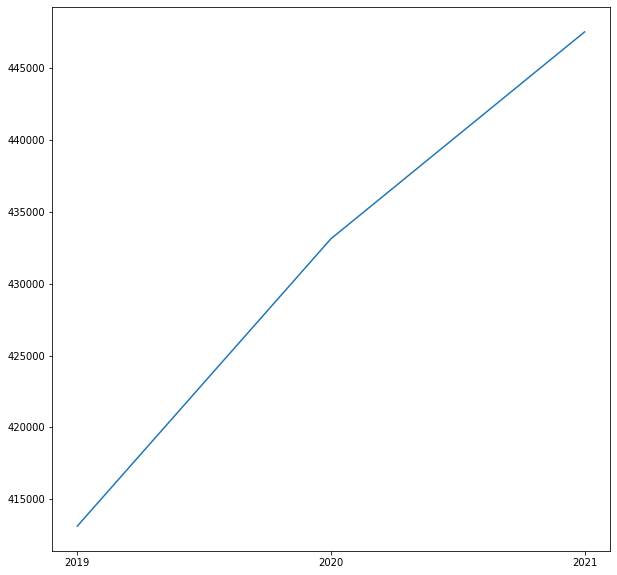

In [ ]:
graphgarismiskin = avgpertahun(df_GarisMiskin,'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)','tahun')
print(graphgarismiskin)
plt.figure(figsize=(10,10))
x=graphgarismiskin['tahun']
y=graphgarismiskin['Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']
#plt.ylim(ymin=50,ymax=75)
df_plot = plt.plot(x,y)

Dapat diketahui bahwa rata-rata nilai Rupiah/Perkapita/Perbulan meningkat pertahunnya, ini menunjukkan bahwa terdapat pertumbuhan ekonomi, namun belum dapat disimpulkan korelasi dengan Indeks pendidikan

In [ ]:
df_test_miskin = pd.merge(df_GarisMiskin,df_IP, on=['tahun','kabupaten'])

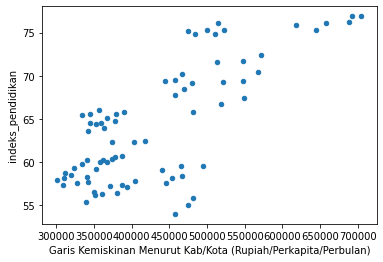

In [ ]:
df_test_miskin.plot(kind='scatter', x='Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)', y='indeks_pendidikan')

Dapat diketahui bahwa peningkatan dari nilai Rupiah/Perkapita/Perbulan, mempunyai trend meningkatkan nilai indeks pendidikan

# Gabung semua data


In [ ]:
df_list= [df_IP, df_Aksara,
          df_PusBel, df_Perpus,
          df_AngkKerja, df_Kepadatan,
          df_jumlahsekolah, df_Guru,
          df_jarak, df_GarisMiskin]
df_total= df_list[0]
for df_ in df_list[1:]:
    df_total = pd.merge(df_total,df_, on=['tahun','kabupaten'])

In [ ]:
df_total.head(10)

,tahun,kabupaten,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,2019,KABUPATEN BOGOR,62.27,0.697115,254,298,2791651,1740,1823,690,183,160,18954,9574,3607,5323,7.141827,10.615385,11.794189,373799.0
1,2019,KABUPATEN SUKABUMI,57.34,0.808399,266,103,1120711,620,1211,330,78,183,9325,4576,1698,2221,7.678947,12.200000,14.206349,309676.0
2,2019,KABUPATEN CIANJUR,56.51,0.833333,252,193,1081183,597,1256,314,92,139,11556,4979,1605,3167,7.320113,12.269341,13.418338,350760.0
3,2019,KABUPATEN BANDUNG,64.52,0.744444,161,111,1786162,2015,1406,322,108,179,14767,6728,2755,2986,6.055762,10.744444,14.003704,345177.0
4,2019,KABUPATEN GARUT,57.87,0.857482,315,233,1155071,743,1584,381,124,136,12297,5930,2744,3598,7.619048,11.680191,12.480861,301202.0
5,2019,KABUPATEN TASIKMALAYA,58.68,0.917379,271,153,867603,704,1086,259,67,69,8413,4403,1412,2773,6.347578,10.170940,12.014327,311848.0
6,2019,KABUPATEN CIAMIS,63.94,0.794574,182,107,624897,886,745,121,27,44,6381,2824,1032,1600,5.735409,9.197674,10.311284,363750.0
7,2019,KABUPATEN KUNINGAN,58.21,0.941828,323,226,502051,1054,652,103,28,108,6431,2915,1239,1912,6.382271,9.988858,13.530556,340775.0
8,2019,KABUPATEN CIREBON,56.37,0.849515,329,248,1064928,2224,921,187,47,56,9217,4974,1450,2827,6.260976,9.364078,9.090024,381372.0
9,2019,KABUPATEN MAJALENGKA,57.55,0.921212,288,250,627874,1086,667,104,22,90,6340,2750,1002,1722,4.939394,8.726444,11.192661,445184.0


In [ ]:
#Cek apakah ada data yang kosong
df_total.isnull().values.any()

False

Karena data sudah tidak ada yang kosong, maka disimpan dalam bentuk dataset

In [ ]:
df_total.to_excel('/content/drive/MyDrive/DatasetHackathon/Dataset.xlsx',index=False)

In [ ]:
df_total.columns

Index(['tahun', 'kabupaten', 'indeks_pendidikan',
       'status_kegiatan_buta_aksara', 'ketersediaan_pkbm', 'ketersediaan_tbm',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah SD',
       'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',
       'waktu_tempuh_sd_terdekat', 'waktu_tempuh_smp_terdekat',
       'waktu_tempuh_sma_terdekat',
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)'],
      dtype='object')

In [ ]:
df_total.dtypes

tahun                                                             object
kabupaten                                                         object
indeks_pendidikan                                                float64
status_kegiatan_buta_aksara                                      float64
ketersediaan_pkbm                                                  int64
ketersediaan_tbm                                                   int64
jumlah_angkatan_kerja                                              int64
kepadatan_penduduk                                                 int64
Jumlah SD                                                          int64
Jumlah SMP                                                         int64
Jumlah SMA                                                         int64
Jumlah SMK                                                         int64
Jumlah Guru SD                                                     int64
Jumlah Guru SMP                                    

# Cek Korelasi Fitur

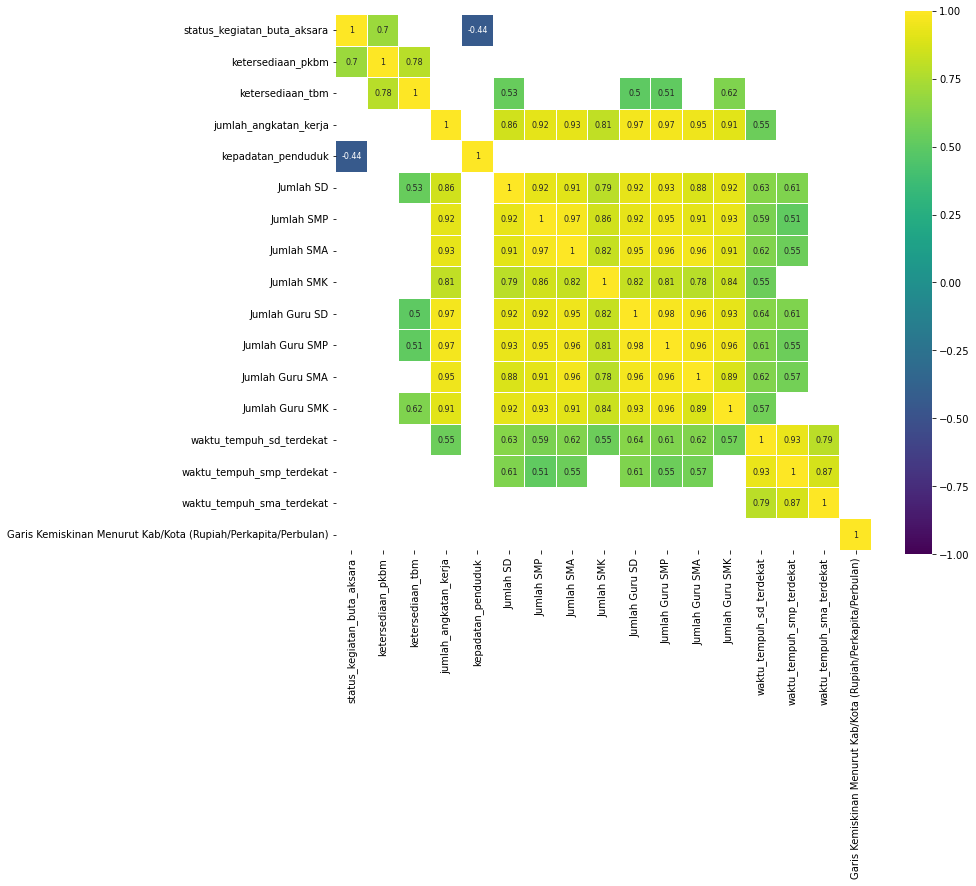

In [ ]:
cols= [
       'status_kegiatan_buta_aksara', 'ketersediaan_pkbm', 'ketersediaan_tbm',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah SD',
       'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',
       'waktu_tempuh_sd_terdekat', 'waktu_tempuh_smp_terdekat',
       'waktu_tempuh_sma_terdekat',
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']
corr = df_total[cols].corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

Dapat terlihat bahwa korelasi antar fitur mempunyai nilai yang cukup tinggi

In [ ]:
cols1= [
        'Jumlah SD',
       'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',
]

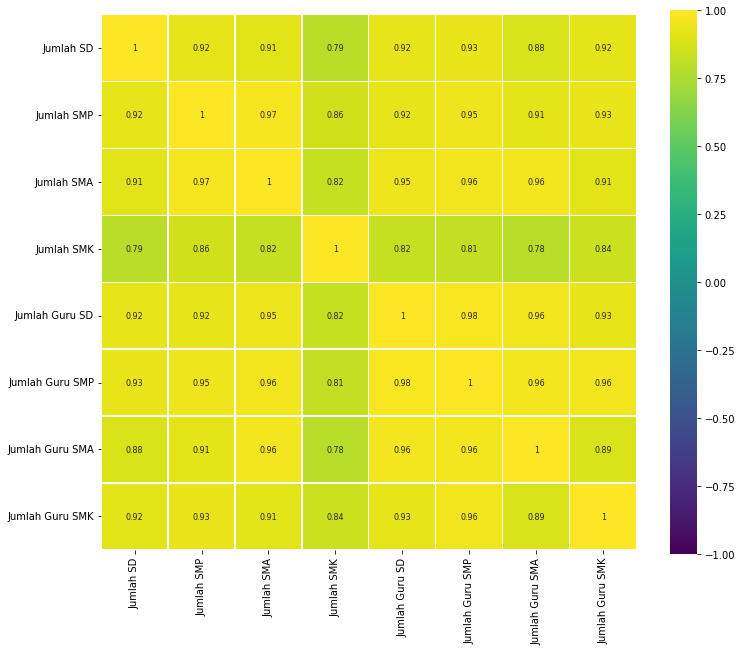

In [ ]:
plt.figure(figsize=(12, 10))

sns.heatmap(data = df_total[cols1].corr(), 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

Masing masing jumlah SD, SMP, SMA dan SMK maupun Jumlah Guru SD, SMP, SMA dan SMK mempunyai korelasi yang sangat tinggi. Hal ini dapat menunjukkan bahwa pengembangan sekolah di tiap daerah merata antara tiap jenis sekolah, hal ini tentunya juga membuat jumlah guru mengikuti trend naik juga. Namun kita akan tetap retain fitur-fitur ini dalam pembuatan model

In [ ]:
cols2= [
       'Jumlah Guru SD','Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK','jumlah_angkatan_kerja'
]

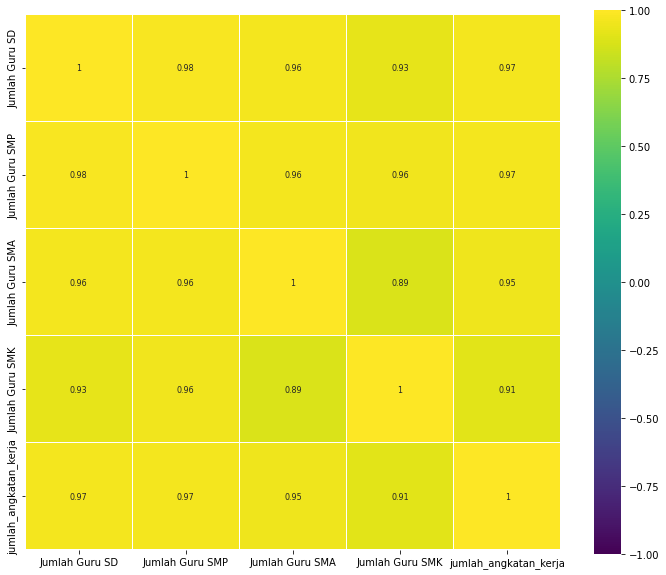

In [ ]:
plt.figure(figsize=(12, 10))

sns.heatmap(data = df_total[cols2].corr(), 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

Jumlah Guru berkorelasi tinggi terhadap jumlah angkatan kerja, hal ini masuk akal karena semakin banyak guru, maka akan meningkatkan jumlah angkatan kerja, terutama guru sd dan guru smp. 


In [ ]:
cols3= [
       'Jumlah SD','Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK','jumlah_angkatan_kerja'
]

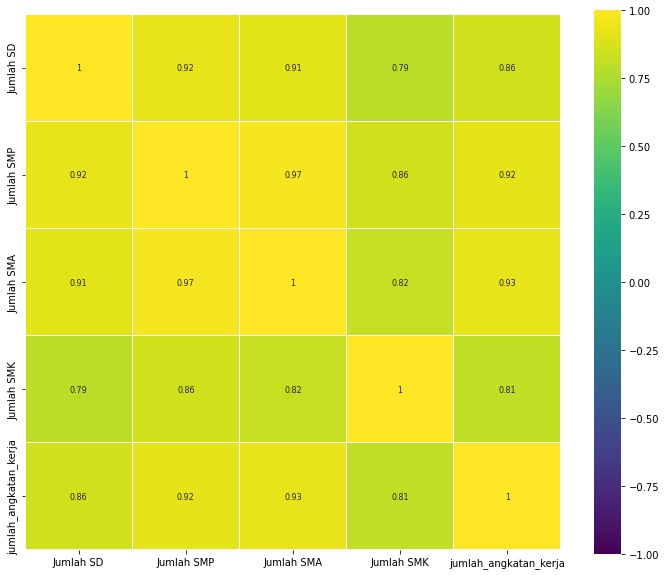

In [ ]:
plt.figure(figsize=(12, 10))

sns.heatmap(data = df_total[cols3].corr(), 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

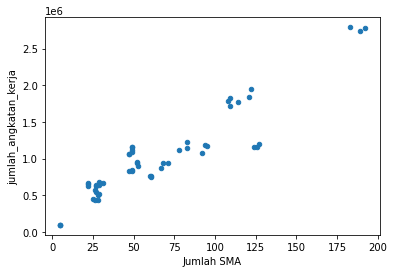

In [ ]:
df_total.plot(kind='scatter', x='Jumlah SMA', y='jumlah_angkatan_kerja')

Jumlah Sekolah juga berkorelasi tinggi terhadap jumlah angkatan kerja. Namun data yang dapat kita ambil adalah, Jumlah SMA mempunyai korelasi yang lebih tinggi dibandingkan jumlah sekolah lainnya. Hal ini dapat mengimplikasikan bahwa banyaknya SMA lebih berpengaruh pada nilai jumlah angkatan kerja
